## Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime as dt
%matplotlib inline

In [2]:
gerard = pd.read_csv("data/gerardtieng_2019_1.csv")

In [3]:
gerard.head()

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,...,promoted hashtag clicks,promoted detail expands,promoted permalink clicks,promoted app opens,promoted app installs,promoted follows,promoted email tweet,promoted dial phone,promoted media views,promoted media engagements
0,1091095912330551297,https://twitter.com/gerardtieng/status/1091095...,@JonathanBice77 https://t.co/wXF61ipAc5,2019-01-31 22:08 +0000,312.0,1.0,0.003205,0.0,1.0,0.0,...,-,-,-,-,-,-,-,-,-,-
1,1091057556506722305,https://twitter.com/gerardtieng/status/1091057...,Nobody asked for Cool Ranch Doritos like nobod...,2019-01-31 19:36 +0000,547.0,7.0,0.012797,0.0,2.0,1.0,...,-,-,-,-,-,-,-,-,-,-
2,1091026622105509888,https://twitter.com/gerardtieng/status/1091026...,@LAValiant @SeoulDynasty @Spitfire 👁👁,2019-01-31 17:33 +0000,140.0,0.0,0.000000,0.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-
3,1090784520847220736,https://twitter.com/gerardtieng/status/1090784...,@jennbojones https://t.co/alE3oViCC1,2019-01-31 01:31 +0000,181.0,1.0,0.005525,0.0,1.0,0.0,...,-,-,-,-,-,-,-,-,-,-
4,1090783481192501249,https://twitter.com/gerardtieng/status/1090783...,@jennbojones Welcome to #TeamSCUF.,2019-01-31 01:27 +0000,205.0,2.0,0.009756,0.0,1.0,0.0,...,-,-,-,-,-,-,-,-,-,-


In [4]:
for i in np.arange(2, 13):
    df = pd.read_csv("data/gerardtieng_2019_{}.csv".format(i))
    gerard = pd.concat([gerard, df])

In [5]:
gerard.shape

(2040, 40)

## Data Selection

In [6]:
gerard.columns

Index(['Tweet id', 'Tweet permalink', 'Tweet text', 'time', 'impressions',
       'engagements', 'engagement rate', 'retweets', 'replies', 'likes',
       'user profile clicks', 'url clicks', 'hashtag clicks', 'detail expands',
       'permalink clicks', 'app opens', 'app installs', 'follows',
       'email tweet', 'dial phone', 'media views', 'media engagements',
       'promoted impressions', 'promoted engagements',
       'promoted engagement rate', 'promoted retweets', 'promoted replies',
       'promoted likes', 'promoted user profile clicks', 'promoted url clicks',
       'promoted hashtag clicks', 'promoted detail expands',
       'promoted permalink clicks', 'promoted app opens',
       'promoted app installs', 'promoted follows', 'promoted email tweet',
       'promoted dial phone', 'promoted media views',
       'promoted media engagements'],
      dtype='object')

In [7]:
gerard = gerard[["Tweet permalink", "Tweet text", "time", "impressions", "engagements", "retweets", "replies", "likes", "user profile clicks"]].copy()

In [8]:
gerard["time"] = pd.to_datetime(gerard["time"])

In [9]:
gerard["hour"] = gerard["time"].dt.hour
gerard["month"] = gerard["time"].dt.month
gerard["dayofweek"] = gerard["time"].dt.dayofweek

In [10]:
gerard_tweets = gerard[~gerard["Tweet text"].str.startswith("@")]
gerard_replies = gerard[gerard["Tweet text"].str.startswith("@")]

## Activity Summary

In [11]:
month_activity = gerard_tweets.groupby("month").count()
day_activity = gerard_tweets.groupby("dayofweek").count()
hour_activity = gerard_tweets.groupby("hour").count()

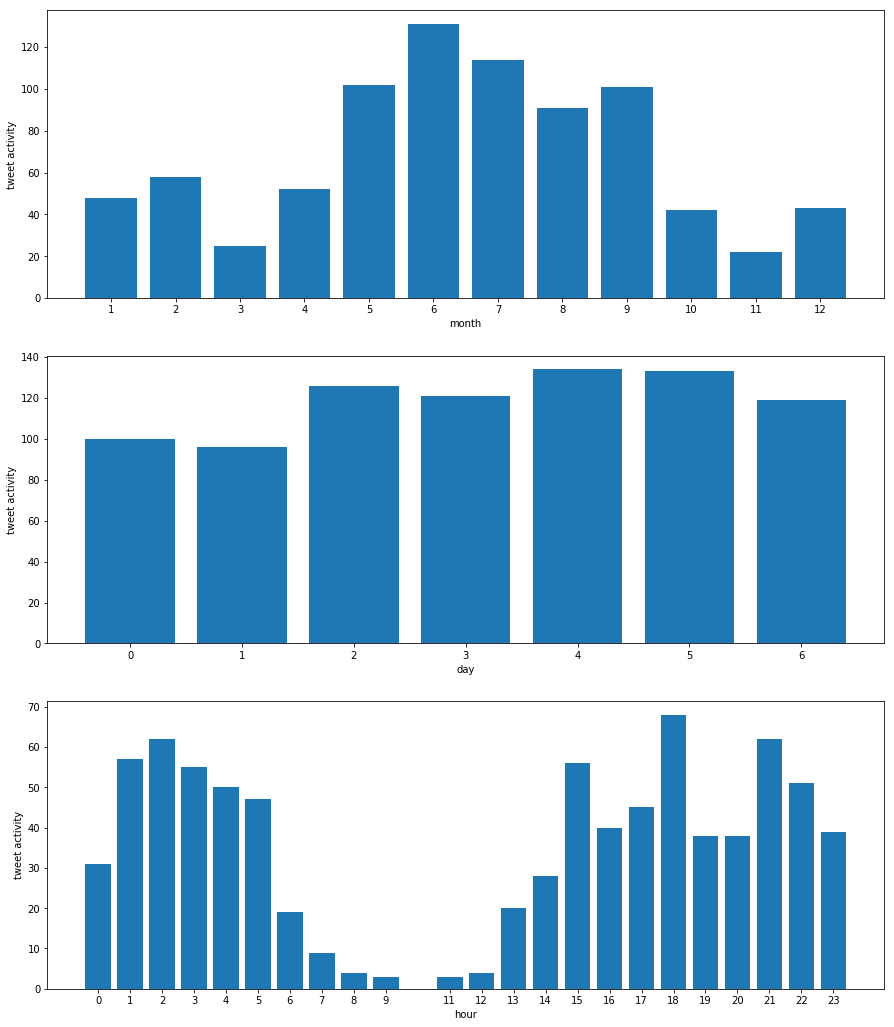

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(15, 18))

ax[0].bar(month_activity.index, month_activity["Tweet permalink"], tick_label=month_activity.index)
ax[0].set_xlabel("month")
ax[0].set_ylabel("tweet activity")

ax[1].bar(day_activity.index, day_activity["Tweet permalink"], tick_label=day_activity.index)
ax[1].set_xlabel("day")
ax[1].set_ylabel("tweet activity")

ax[2].bar(hour_activity.index, hour_activity["Tweet permalink"], tick_label=hour_activity.index)
ax[2].set_xlabel("hour")
ax[2].set_ylabel("tweet activity")


plt.show()

In [13]:
all_replies = {}

for tweets in gerard_replies["Tweet text"]:
    tweets = tweets.split()
    for words in tweets:
        if words.startswith("@"):
            if words not in all_replies:
                all_replies[words] = 1
            else:
                all_replies[words] += 1

In [14]:
all_replies = pd.DataFrame.from_dict(all_replies,orient="index")
all_replies.sort_values(0, ascending=False).head(10)

,0
@PatrickAArevalo,64
@GoldieChan,59
@oldfilmsflicker,46
@THEKyleMoffatt,41
@MoltenSlowa,40
@GavinBigLo,38
@jennbojones,37
@JohnAratan,34
@SuperBentendo,26
@PatrickCH,24


In [15]:
all_hashtags = {}

for tweets in gerard_tweets["Tweet text"]:
    tweets = tweets.lower().split()
    for words in tweets:
        if words.startswith("#"):
            if words not in all_hashtags:
                all_hashtags[words] = 1
            else:
                all_hashtags[words] += 1

In [16]:
all_hashtags = pd.DataFrame.from_dict(all_hashtags,orient="index")
all_hashtags.sort_values(0, ascending=False).head(10)

,0
#wrestlemania,7
#ds9,4
#startrek,3
#sonicmovie,3
#apahm,3
#suddenlykeanu,2
#stateofplay,2
#wrestemania,2
#e3,2
#xboxe3,1


## Engagement Summary

In [17]:
gerard_tweets[["impressions", "engagements", "retweets", "likes", "replies", "user profile clicks"]].sum()

impressions            276277.0
engagements              9487.0
retweets                   88.0
likes                    1735.0
replies                   456.0
user profile clicks       690.0
dtype: float64

In [18]:
gerard_tweets[["impressions", "engagements", "retweets", "likes", "replies", "user profile clicks"]].sum() / gerard_tweets.shape[0]

impressions            333.265380
engagements             11.443908
retweets                 0.106152
likes                    2.092883
replies                  0.550060
user profile clicks      0.832328
dtype: float64

Text(0.5,1,'replies by month')

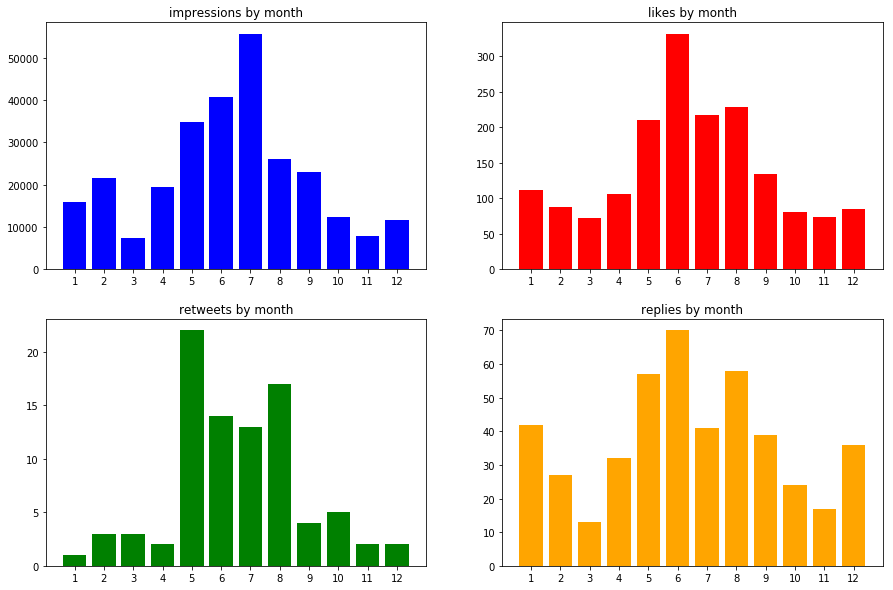

In [19]:
month_engagement = gerard_tweets.groupby("month").sum()

fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0,0].bar(month_engagement.index, month_engagement["impressions"], tick_label=month_engagement.index, color="blue")
ax[0,0].set_title("impressions by month")
ax[0,1].bar(month_engagement.index, month_engagement["likes"], tick_label=month_engagement.index, color="red")
ax[0,1].set_title("likes by month")
ax[1,0].bar(month_engagement.index, month_engagement["retweets"], tick_label=month_engagement.index, color="green")
ax[1,0].set_title("retweets by month")
ax[1,1].bar(month_engagement.index, month_engagement["replies"], tick_label=month_engagement.index, color="orange")
ax[1,1].set_title("replies by month")

Text(0.5,1,'replies by day')

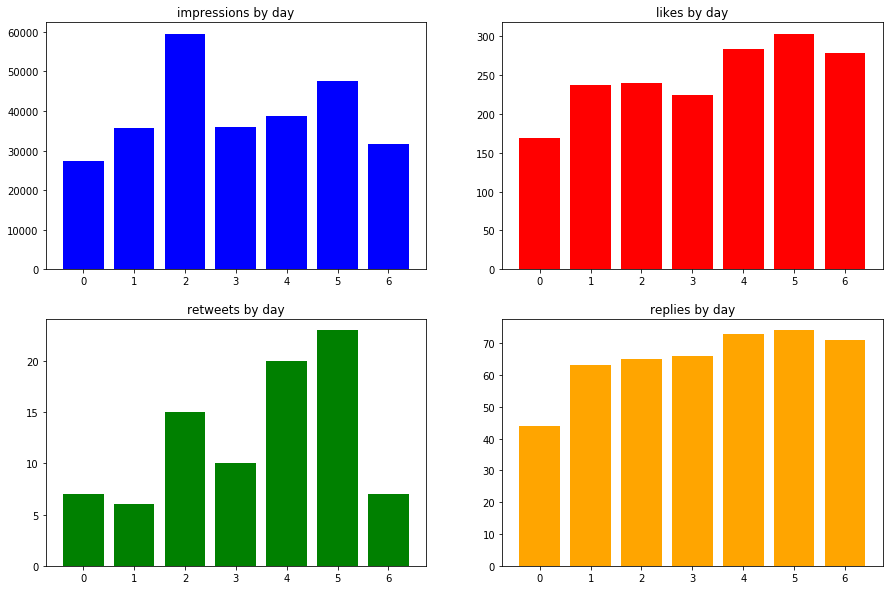

In [20]:
day_engagement = gerard_tweets.groupby("dayofweek").sum()

fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0,0].bar(day_engagement.index, day_engagement["impressions"], tick_label=day_engagement.index, color="blue")
ax[0,0].set_title("impressions by day")
ax[0,1].bar(day_engagement.index, day_engagement["likes"], tick_label=day_engagement.index, color="red")
ax[0,1].set_title("likes by day")
ax[1,0].bar(day_engagement.index, day_engagement["retweets"], tick_label=day_engagement.index, color="green")
ax[1,0].set_title("retweets by day")
ax[1,1].bar(day_engagement.index, day_engagement["replies"], tick_label=day_engagement.index, color="orange")
ax[1,1].set_title("replies by day")

Text(0.5,1,'replies by hour')

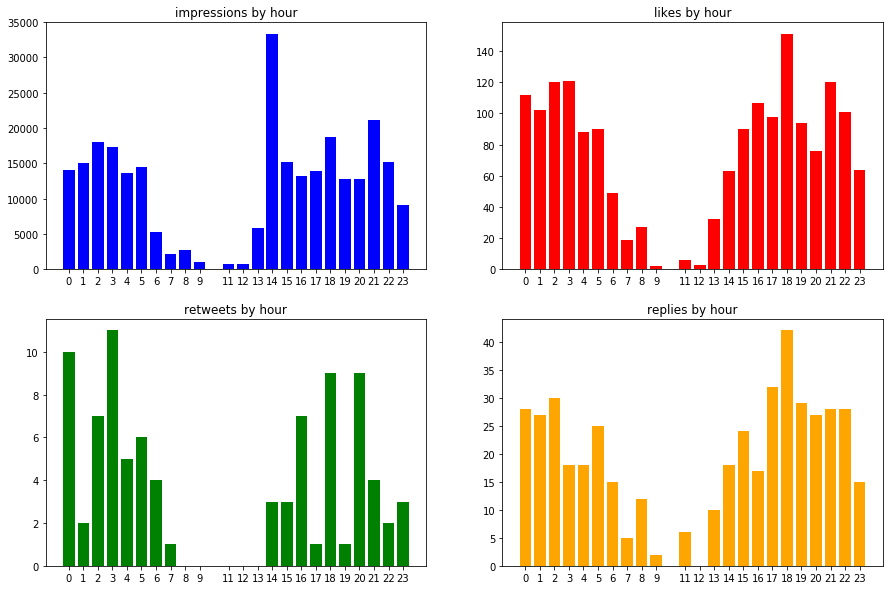

In [21]:
hour_engagement = gerard_tweets.groupby("hour").sum()

fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0,0].bar(hour_engagement.index, hour_engagement["impressions"], tick_label=hour_engagement.index, color="blue")
ax[0,0].set_title("impressions by hour")
ax[0,1].bar(hour_engagement.index, hour_engagement["likes"], tick_label=hour_engagement.index, color="red")
ax[0,1].set_title("likes by hour")
ax[1,0].bar(hour_engagement.index, hour_engagement["retweets"], tick_label=hour_engagement.index, color="green")
ax[1,0].set_title("retweets by hour")
ax[1,1].bar(hour_engagement.index, hour_engagement["replies"], tick_label=hour_engagement.index, color="orange")
ax[1,1].set_title("replies by hour")

## Content Analysis

In [22]:
from wordcloud import WordCloud, STOPWORDS

In [23]:
from wordcloud import WordCloud, STOPWORDS 
import re

def tweet_cleaner(tweet):
    non_emoji = [letter for letter in "\\\'\"1234567890abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ`~!@#$%^&*()-_=+[{]}|,<.>/?"]
    tweet = str(tweet)
    tweet = re.sub(r"https://\S+", "", tweet) #eliminates urls
    tweet = re.sub(r"amp\b", "", tweet) #eliminates ampersand
    return tweet

In [24]:
best_impressions = gerard_tweets.sort_values("impressions", ascending=False)[0:20]
best_impressions = best_impressions["Tweet text"].apply(tweet_cleaner)

best_likes = gerard_tweets.sort_values("likes", ascending=False)[0:20]
best_likes = best_likes["Tweet text"].apply(tweet_cleaner)

best_retweets = gerard_tweets.sort_values("retweets", ascending=False)[0:20]
best_retweets = best_retweets["Tweet text"].apply(tweet_cleaner)

best_replies = gerard_tweets.sort_values("replies", ascending=False)[0:20]
best_replies = best_replies["Tweet text"].apply(tweet_cleaner)

best_categories = [best_impressions, best_likes, best_retweets, best_replies]

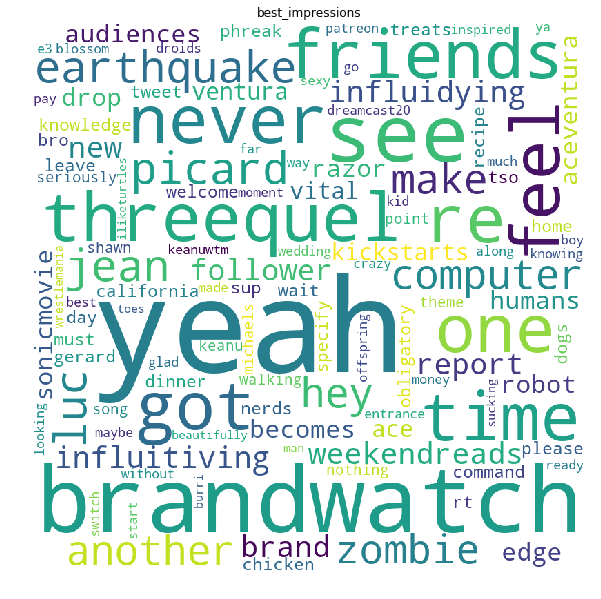

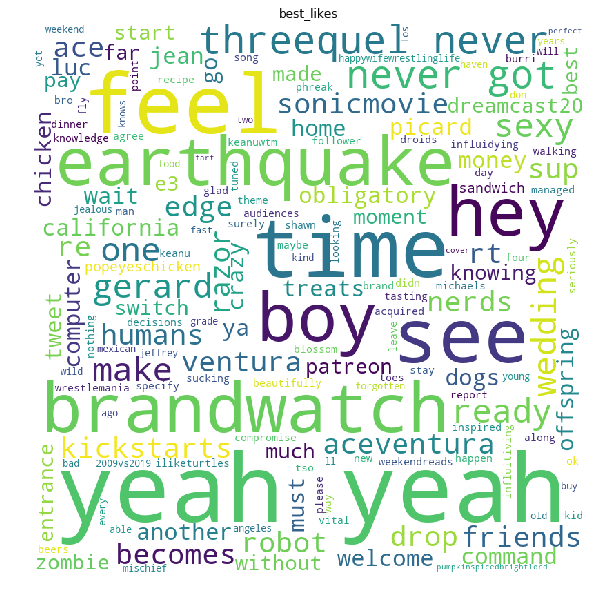

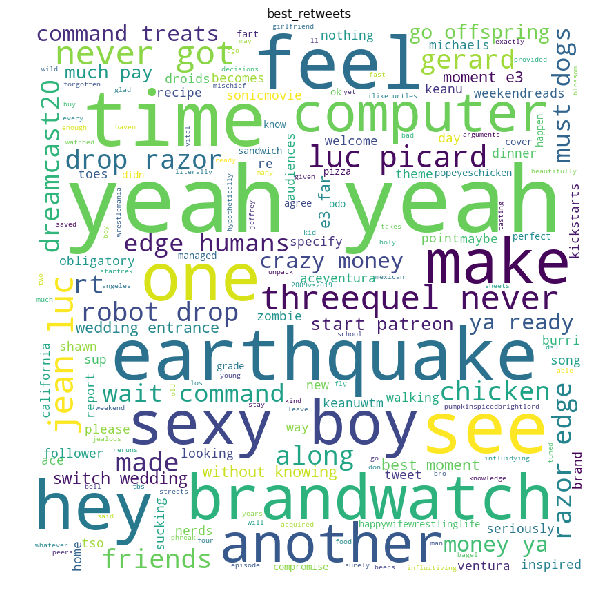

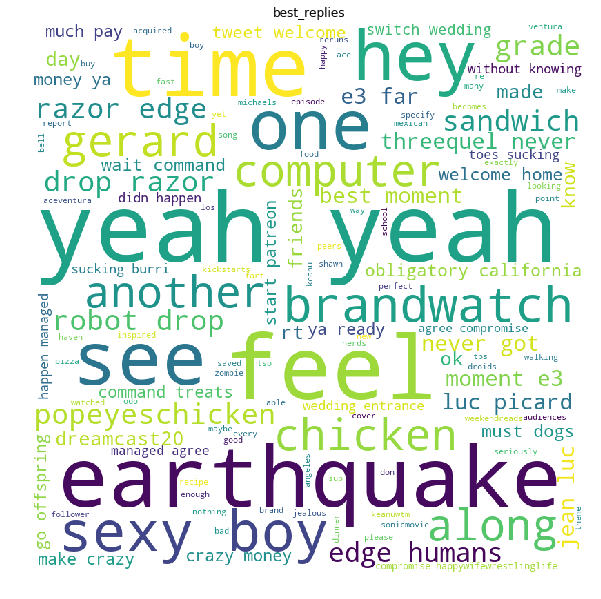

In [25]:
comment_words = ' '
stopwords = set(STOPWORDS) 
cloud_title_count = 0

# iterate through the csv file 
for category in best_categories:
    cloud_title = ["best_impressions", "best_likes", "best_retweets", "best_replies"]
    
    for val in category: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.title(cloud_title[cloud_title_count])
    cloud_title_count += 1

/Users/gerardtieng/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


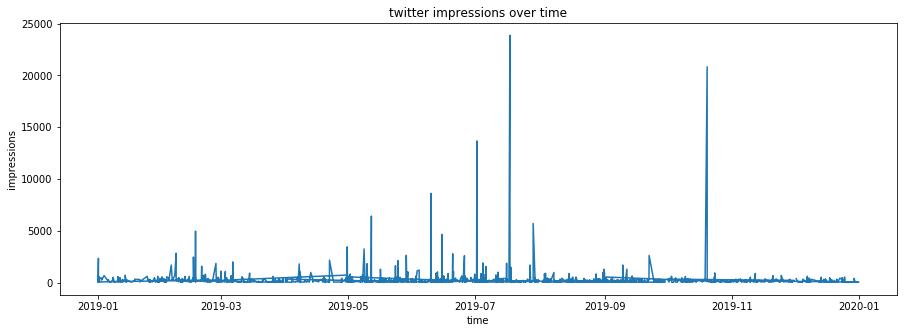

In [26]:
plt.figure(figsize=(15,5))
plt.plot(gerard["time"], gerard["impressions"])
plt.title("twitter impressions over time")
plt.xlabel("time")
plt.ylabel("impressions")
plt.show()